In [2]:
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Import dataset

In [4]:
file_path_1 = './raw_data/flight_price.csv'
file_path_2 = './raw_data/weatherAUS.csv'
file_path_3 = './raw_data/otp_time_series_web.csv'

# Read the file into data frame that Python can process
flight_price_df = pd.read_csv(file_path_1)
weather_df = pd.read_csv(file_path_2)
delay_df = pd.read_csv(file_path_3)

# Display data frame for easy inspector
display(flight_price_df.head())
display(weather_df.head())
display(delay_df.head())


Year  Month  YearMonth     Port1       Port2                  Route  \
0  2010      1     201001  Adelaide    Brisbane    Adelaide - Brisbane   
1  2010      1     201001  Adelaide    Canberra    Adelaide - Canberra   
2  2010      1     201001  Adelaide      Darwin      Adelaide - Darwin   
3  2010      1     201001  Adelaide  Gold Coast  Adelaide - Gold Coast   
4  2010      1     201001  Adelaide   Melbourne   Adelaide - Melbourne   

   $Value  $Real Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0     208  297.4        NaN         NaN          NaN          NaN   
1     258  368.8        NaN         NaN          NaN          NaN   
2     358  511.8        NaN         NaN          NaN          NaN   
3     128  183.0        NaN         NaN          NaN          NaN   
4      86  122.9        NaN         NaN          NaN          NaN   

   Unnamed: 12  Unnamed: 13  Unnamed: 14 Unnamed: 15  
0          NaN          NaN          NaN         NaN  
1          NaN          NaN          NaN         NaN  
2          NaN          NaN          NaN         NaN  
3          NaN          NaN          NaN         NaN  
4          NaN          NaN          NaN         NaN

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

Route Departing_Port Arriving_Port       Airline   Month  \
0    Adelaide-Brisbane       Adelaide      Brisbane  All Airlines  Jan-04   
1    Adelaide-Canberra       Adelaide      Canberra  All Airlines  Jan-04   
2  Adelaide-Gold Coast       Adelaide    Gold Coast  All Airlines  Jan-04   
3   Adelaide-Melbourne       Adelaide     Melbourne  All Airlines  Jan-04   
4       Adelaide-Perth       Adelaide         Perth  All Airlines  Jan-04   

   Sectors_Scheduled  Sectors_Flown  Cancellations  Departures_On_Time  \
0              155.0            155            0.0               123.0   
1               75.0             75            0.0                72.0   
2               40.0             40            0.0                36.0   
3              550.0            548            2.0               478.0   
4              191.0            191            0.0               169.0   

   Arrivals_On_Time  Departures_Delayed  Arrivals_Delayed  Year  Month_Num  
0             120.0                32.0              35.0  2004          1  
1              72.0                 3.0               3.0  2004          1  
2              35.0                 4.0               5.0  2004          1  
3             487.0                70.0              61.0  2004          1  
4             168.0                22.0              23.0  2004          1

## Backup dataset

In [8]:
#Backup file for further processing and just in case the processing is wrong and we do not need to download again 
flight_price_df_copy = flight_price_df.copy()
weather_df_copy = weather_df.copy()
delay_df_copy = delay_df.copy()

## Data Imputation: 
This is to check the data condition to consider the next cleaning step

In [11]:
# This for loop is to check the percentage of missing value which helps in considering features for training models
for col in weather_df.columns:
    missing_data = weather_df[col].isna().sum()
    missing_percent = missing_data/len(weather_df)*100
    print(f"Column {col} has {missing_percent:.2f}% missing values")

# This for loop is to check the percentage of missing value which helps in considering features for training models
for col in flight_price_df.columns:
    missing_data = flight_price_df[col].isna().sum()
    missing_percent = missing_data/len(flight_price_df)*100
    print(f"Column {col} has {missing_percent:.2f}% missing values")

# This for loop is to check the percentage of missing value which helps in considering features for training models
for col in delay_df.columns:
    missing_data = delay_df[col].isna().sum()
    missing_percent = missing_data/len(delay_df)*100
    print(f"Column {col} has {missing_percent:.2f}% missing values")

Column Date has 0.00% missing values
Column Location has 0.00% missing values
Column MinTemp has 1.02% missing values
Column MaxTemp has 0.87% missing values
Column Rainfall has 2.24% missing values
Column Evaporation has 43.17% missing values
Column Sunshine has 48.01% missing values
Column WindGustDir has 7.10% missing values
Column WindGustSpeed has 7.06% missing values
Column WindDir9am has 7.26% missing values
Column WindDir3pm has 2.91% missing values
Column WindSpeed9am has 1.21% missing values
Column WindSpeed3pm has 2.11% missing values
Column Humidity9am has 1.82% missing values
Column Humidity3pm has 3.10% missing values
Column Pressure9am has 10.36% missing values
Column Pressure3pm has 10.33% missing values
Column Cloud9am has 38.42% missing values
Column Cloud3pm has 40.81% missing values
Column Temp9am has 1.21% missing values
Column Temp3pm has 2.48% missing values
Column RainToday has 2.24% missing values
Column RainTomorrow has 2.25% missing values
Column Year has 0.0

In [13]:
# WEATHER
# Filling missing value with mean
numeric_colums = weather_df_copy.select_dtypes(include=[np.number]).columns
weather_df_copy[numeric_colums] = weather_df_copy[numeric_colums].fillna(weather_df_copy[numeric_colums].mean())
# Filling missing fields with mode
categoric_colums = weather_df_copy.select_dtypes(include=[object]).columns
weather_df_copy[categoric_colums] = weather_df_copy[categoric_colums].apply(lambda x: x.fillna(x.mode()[0]))

# FLIGHT_PRICE
# Filling missing value with mean
numeric_colums = flight_price_df_copy.select_dtypes(include=[np.number]).columns
flight_price_df_copy[numeric_colums] = flight_price_df_copy[numeric_colums].fillna(flight_price_df_copy[numeric_colums].mean())
# Filling missing fields with mode
categoric_colums = flight_price_df_copy.select_dtypes(include=[object]).columns
flight_price_df_copy[categoric_colums] = flight_price_df_copy[categoric_colums].apply(lambda x: x.fillna(x.mode()[0]))

# DELAY
# Fill numerical columns with median values
numeric_colums = delay_df_copy.select_dtypes(include=[np.number]).columns
delay_df_copy[numeric_colums] = delay_df_copy[numeric_colums].fillna(delay_df_copy[numeric_colums].mean())
# Fill categorical columns with mode
categoric_colums = delay_df_copy.select_dtypes(include=[object]).columns
delay_df_copy[categoric_colums] = delay_df_copy[categoric_colums].apply(lambda x: x.fillna(x.mode()[0]))

In [15]:
# drop the unneeded columns in dataset which include more than 10% missing value
flight_price_df_copy = flight_price_df_copy.drop(columns=[col for col in flight_price_df_copy.columns if 'Unnamed' in col])
print(flight_price_df_copy)

weather_df_copy = weather_df_copy.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])
print(weather_df_copy)

delay_df_copy = delay_df_copy.drop(columns=['Airline'])

       Year  Month  YearMonth           Port1        Port2  \
0      2010      1     201001        Adelaide     Brisbane   
1      2010      1     201001        Adelaide     Canberra   
2      2010      1     201001        Adelaide       Darwin   
3      2010      1     201001        Adelaide   Gold Coast   
4      2010      1     201001        Adelaide    Melbourne   
...     ...    ...        ...             ...          ...   
11855  2024      3     202403  Port Macquarie       Sydney   
11856  2024      3     202403          Sydney     Tamworth   
11857  2024      3     202403          Sydney   Townsville   
11858  2024      3     202403          Sydney  Wagga Wagga   
11859  2024      3     202403       Newcastle   Gold Coast   

                         Route  $Value  $Real  
0          Adelaide - Brisbane     208  297.4  
1          Adelaide - Canberra     258  368.8  
2            Adelaide - Darwin     358  511.8  
3        Adelaide - Gold Coast     128  183.0  
4         Adela

In [17]:
# Check again to make sure there is not any null value in the processing dataframe 
display(weather_df_copy.isnull().sum())
display(flight_price_df_copy.isnull().sum())
display(delay_df_copy.isnull().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Year         0
Month        0
YearMonth    0
Port1        0
Port2        0
Route        0
$Value       0
$Real        0
dtype: int64

Route                 0
Departing_Port        0
Arriving_Port         0
Month                 0
Sectors_Scheduled     0
Sectors_Flown         0
Cancellations         0
Departures_On_Time    0
Arrivals_On_Time      0
Departures_Delayed    0
Arrivals_Delayed      0
Year                  0
Month_Num             0
dtype: int64

## Data transforming

In [20]:
# Appending Date column in flight_price_df_copy to prepare for merging data (as there are only Month and Year in the dataset)
# We assume that the data is recorded on the first day of the month 
flight_price_df_copy['Date'] = pd.to_datetime(flight_price_df_copy['Year'].astype(str) + '-' + flight_price_df_copy['Month'].astype(str) + '-01')
weather_df_copy['Date'] = pd.to_datetime(weather_df_copy['Date'])
# Standardise data  
weather_df_copy['Location'] = weather_df_copy['Location'].replace('PerthAirport', 'Perth')


## Joining and Merging data

In [23]:
# We merge the flight_price file with the weatherAUS file
merged_df = pd.merge(
    flight_price_df_copy, 
    weather_df_copy, 
    left_on=['Date', 'Port1'], 
    right_on=['Date', 'Location'], 
    how='inner'
)
print(merged_df.head())
# We merge the above merged file with the delay file
merged_df = pd.merge(
    merged_df, 
    delay_df, 
    left_on=['Year', 'Month', 'Port1', 'Port2'], 
    right_on=['Year', 'Month_Num', 'Departing_Port', 'Arriving_Port'], 
    how='inner'
)


   Year  Month  YearMonth     Port1       Port2                  Route  \
0  2010      1     201001  Adelaide    Brisbane    Adelaide - Brisbane   
1  2010      1     201001  Adelaide    Canberra    Adelaide - Canberra   
2  2010      1     201001  Adelaide      Darwin      Adelaide - Darwin   
3  2010      1     201001  Adelaide  Gold Coast  Adelaide - Gold Coast   
4  2010      1     201001  Adelaide   Melbourne   Adelaide - Melbourne   

   $Value  $Real       Date  Location  ...  WindSpeed9am  WindSpeed3pm  \
0     208  297.4 2010-01-01  Adelaide  ...           7.0          15.0   
1     258  368.8 2010-01-01  Adelaide  ...           7.0          15.0   
2     358  511.8 2010-01-01  Adelaide  ...           7.0          15.0   
3     128  183.0 2010-01-01  Adelaide  ...           7.0          15.0   
4      86  122.9 2010-01-01  Adelaide  ...           7.0          15.0   

   Humidity9am Humidity3pm  Pressure9am Pressure3pm Temp9am  Temp3pm  \
0         57.0        45.0       1009.

## Dealing with Outliers

In [26]:
# Calculate Q1, Q3, and IQR
Q1 = merged_df['$Real'].quantile(0.25)
Q3 = merged_df['$Real'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower threshold value: {lower_bound}")
print(f"Upper threshold value: {upper_bound}")

# Check for outliers
outliers = merged_df[(merged_df['$Real'] < lower_bound) | (merged_df['$Real'] > upper_bound)]
print(f"Number of outliers before removal: {len(outliers)}")

# Filter and remove outliers
df_cleaned = merged_df[merged_df['$Real'] < upper_bound]  # Keep only values below the upper threshold
print(f"Total number of records initially: {len(merged_df)}")
print(f"Total number of records after removing outliers: {len(df_cleaned)}")

# Check the number of outliers in df_cleaned
outliers_after_cleaning = df_cleaned[(df_cleaned['$Real'] < lower_bound) | (df_cleaned['$Real'] > upper_bound)]
num_outliers_after_cleaning = len(outliers_after_cleaning)

print(f"Number of outliers in df_cleaned: {num_outliers_after_cleaning}")


Lower threshold value: -167.35
Upper threshold value: 862.65
Number of outliers before removal: 359
Total number of records initially: 16663
Total number of records after removing outliers: 16304
Number of outliers in df_cleaned: 0


## Save clean data ready for analysing

In [29]:
merged_df.to_csv('merged_data.csv', index=False)


## Data Visualization

In [32]:
min_value = merged_df['$Real'].min()
max_value = merged_df['$Real'].max()

print(f"Min value: {min_value}")
print(f"Max value: {max_value}")


Min value: 54.0
Max value: 1031.6


## Bar plot - Compare the number of delayed flights for each airline

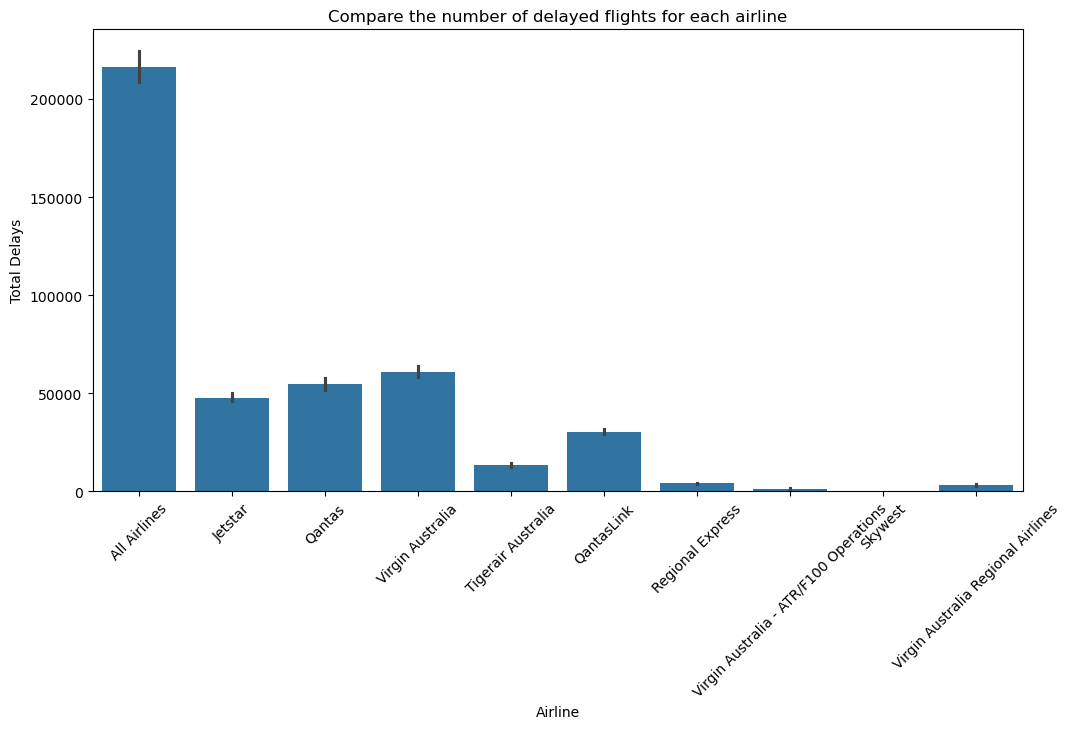

In [35]:
# Compare the number of delayed flights for each airline or airport.
plt.figure(figsize=(12, 6))
sns.barplot(x='Airline', y='Departures_Delayed', data=merged_df, estimator=sum)
plt.title('Compare the number of delayed flights for each airline')
plt.xlabel('Airline')
plt.ylabel('Total Delays')
plt.xticks(rotation=45)
plt.show()

## Box plot - Display the variation in wind gust speeds among several airlines

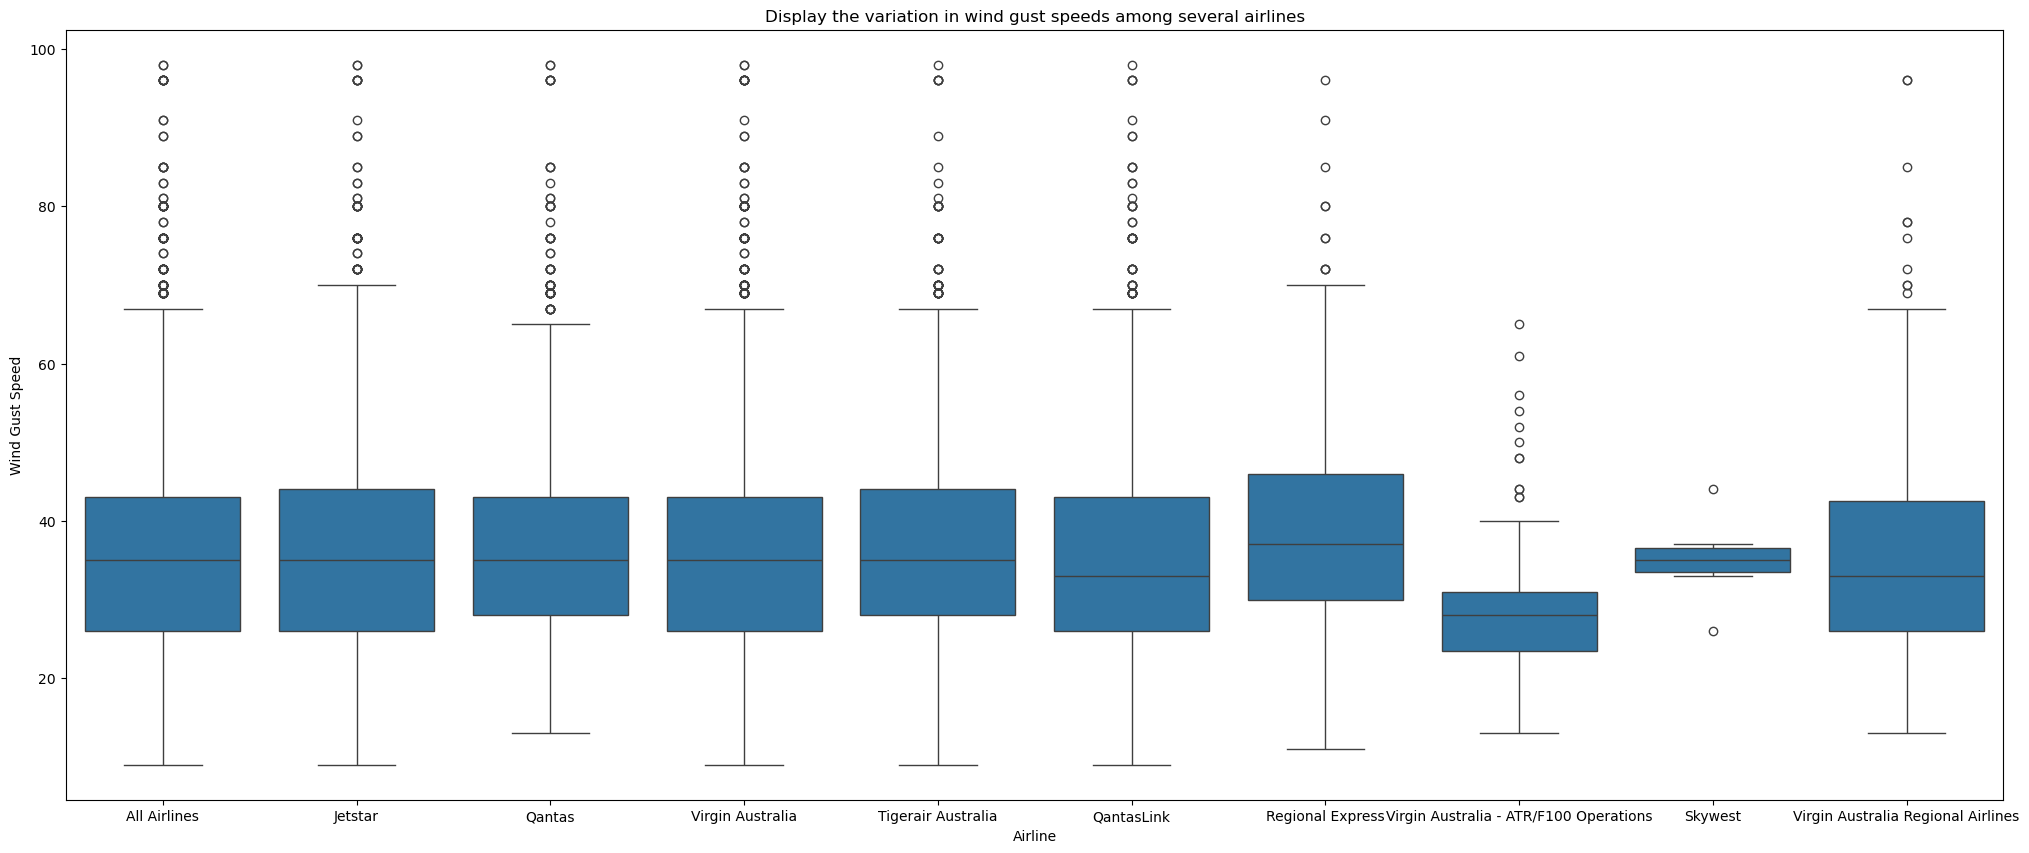

In [38]:
# display the variation in wind gust speeds among several airlines
plt.figure(figsize=(25, 10))
sns.boxplot(x='Airline', y='WindGustSpeed', data=merged_df)
plt.title('Display the variation in wind gust speeds among several airlines')
plt.xlabel('Airline')
plt.ylabel('Wind Gust Speed')
plt.show()

## Line plot - Average Flight Price in the Same Month Across Different Years

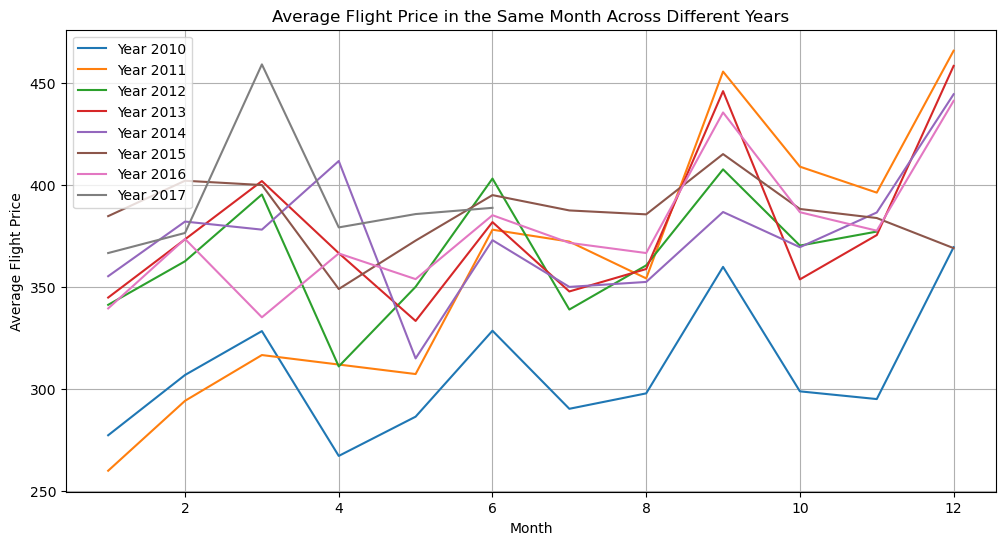

In [41]:
plt.figure(figsize=(12, 6))
# Loop through each unique year in the 'Year' column of merged_df.
for year in merged_df['Year'].unique():
    # Filter rows by the current year, group by 'Month_x', and calculate the mean flight price ('$Real') for each month.
    monthly_data = merged_df[merged_df['Year'] == year].groupby('Month_x')['$Real'].mean()
    # Plot the average monthly flight prices for each year, with the year labeled for identification.
    plt.plot(monthly_data.index, monthly_data.values, label=f'Year {year}')

# Set the title of the plot.
plt.title('Average Flight Price in the Same Month Across Different Years')
plt.xlabel('Month')
plt.ylabel('Average Flight Price')
plt.legend()
plt.grid()
plt.show()


## Feature Engineering & Feature Scaling

In [90]:
# It is used to convert categorical variables into a numerical format that machine learning algorithms can understand
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Categorical columns
categorical_cols = ['Port1', 'Port2', 'Departing_Port', 'Arriving_Port']
# Numerical columns
numeric_cols = ['MinTemp', 'MaxTemp', 'WindGustSpeed', '$Value']
# Select features for modeling
X = merged_df[['Port1', 'Port2', 'MinTemp', 'MaxTemp', 'WindGustSpeed', '$Value', 'Departing_Port', 'Arriving_Port']]
# Select target for modeling - $Real - Released flight price on the website
y = merged_df['$Real'] 

ct = ColumnTransformer(
    transformers=[
        ('encode', OneHotEncoder(), categorical_cols),  # Encode categorical columns
        ('scale', StandardScaler(), numeric_cols)  # Scale numerical columns
    ]
)

In [92]:
print(merged_df.dtypes)

Year                           int64
Month_x                        int64
YearMonth                      int64
Port1                         object
Port2                         object
Route_x                       object
$Value                         int64
$Real                        float64
Date                  datetime64[ns]
Location                      object
MinTemp                      float64
MaxTemp                      float64
Rainfall                     float64
WindGustDir                   object
WindGustSpeed                float64
WindDir9am                    object
WindDir3pm                    object
WindSpeed9am                 float64
WindSpeed3pm                 float64
Humidity9am                  float64
Humidity3pm                  float64
Pressure9am                  float64
Pressure3pm                  float64
Temp9am                      float64
Temp3pm                      float64
RainToday                     object
RainTomorrow                  object
R

## Data plitting 

In [95]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [97]:
# Apply ColumnTransformer to encode and scale the data
X_processed = ct.fit_transform(X)

In [99]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [101]:
print(merged_df['$Real'].describe())

count    16663.000000
mean       368.235390
std        199.862175
min         54.000000
25%        218.900000
50%        315.000000
75%        476.400000
max       1031.600000
Name: $Real, dtype: float64


## Model Selection

### Linear Regression

In [59]:
# Create and train the linear regression model
from sklearn.linear_model import LinearRegression  # Import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score  # Import the metrics used for evaluation
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Test MSE: {mse_test}")
print(f"Test R-squared: {r2_test}")


Test MSE: 274.8117191403099
Test R-squared: 0.9931706817031539


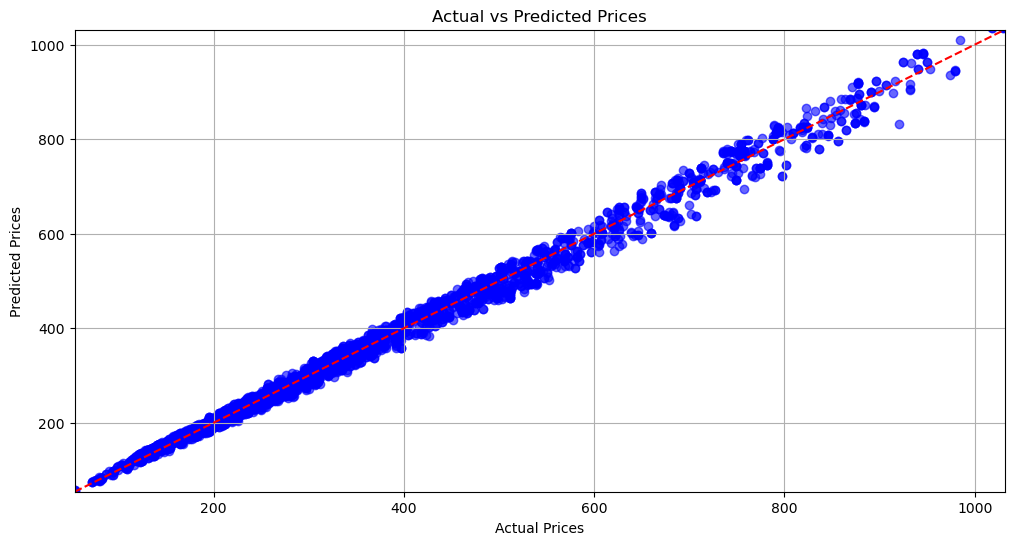

In [61]:
# 1. Scatter plot of Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Identity line
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid(True)
plt.show()

## Trial Linear regression on predicting flight price

In [64]:
# Prepare new input data
new_data_dict = {
    'Port1': ['Sydney'],          # Categorical feature
    'Port2': ['Melbourne'],       # Categorical feature
    'MinTemp': [15.0],            # Numerical feature
    'MaxTemp': [25.0],            # Numerical feature
    'WindGustSpeed': [45.0],      # Numerical feature
    '$Value': [250.0],            # Numerical feature
    'Departing_Port': ['Sydney'], # Categorical feature
    'Arriving_Port': ['Melbourne'], # Categorical feature
    'Airline': ['Qantas']         # Categorical feature
}

# Convert new data to DataFrame
new_data_df = pd.DataFrame(new_data_dict)

# Preprocess the new data using the same ColumnTransformer as used during training
new_data_processed = ct.transform(new_data_df)

# Make predictions using the retrained Linear Regression model
new_prediction = lin_reg.predict(new_data_processed)
print(f"Predicted Flight Price: {new_prediction[0]}")


Predicted Flight Price: 329.1051266744235


## Cross Validation to check the model efficiency

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Select feature columns and target variable
X = merged_df[['MinTemp', 'MaxTemp', 'WindGustSpeed', '$Value', 'Port1', 'Port2']]  # Include relevant features
y = merged_df['$Real']

# OneHotEncoding for categorical columns (Port1, Port2)
X = pd.get_dummies(X, columns=['Port1', 'Port2'], drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, lin_reg.predict(X_train))
r2_train = r2_score(y_train, lin_reg.predict(X_train))

mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Cross-validation with 5 folds
cv_scores = cross_val_score(lin_reg, X, y, cv=5, scoring='r2')

# Results
{
    "Train MSE": mse_train,
    "Train R-squared": r2_train,
    "Test MSE": mse_test,
    "Test R-squared": r2_test,
    "Cross-Validation R-squared Mean": np.mean(cv_scores),
    "Cross-Validation R-squared Std": np.std(cv_scores)
}


{'Train MSE': 275.3203195736783,
 'Train R-squared': 0.9930942041647366,
 'Test MSE': 274.81169326601764,
 'Test R-squared': 0.9931706823461534,
 'Cross-Validation R-squared Mean': 0.9880261506060126,
 'Cross-Validation R-squared Std': 0.009030785807530254}

## Random Forest Regressor

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict values on the test set
y_pred = rf_model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Test MSE: {mse}")
print(f"Random Forest Test R-squared: {r2}")


Random Forest Test MSE: 11.944572745329316
Random Forest Test R-squared: 0.9997031666282178


## Trial Random Forest Regressor on Predicting flight price

In [106]:
import pandas as pd

# New data for prediction
new_data_dict = {
    'Port1': ['Sydney'],           # Categorical feature
    'Port2': ['Melbourne'],        # Categorical feature
    'MinTemp': [15.0],             # Numerical feature
    'MaxTemp': [25.0],             # Numerical feature
    'WindGustSpeed': [45.0],       # Numerical feature
    '$Value': [250.0],             # Numerical feature
    'Departing_Port': ['Sydney'],  # Categorical feature
    'Arriving_Port': ['Melbourne'] # Categorical feature
}

# Convert to DataFrame
new_data_df = pd.DataFrame(new_data_dict)
# Transform the new data using the pre-trained ColumnTransformer
new_data_processed = ct.transform(new_data_df)

# Use the trained Random Forest Regressor to make a prediction
if new_data_processed.shape[1] == X_train.shape[1]:
    new_prediction = rf_model.predict(new_data_processed)
    print(f"Predicted Flight Price: {new_prediction[0]}")
else:
    print(f"Feature mismatch between training and new data. Expected {X_train.shape[1]} features but got {new_data_processed.shape[1]} features.")


Predicted Flight Price: 327.7940000000001


## Random Forest Classifier

Accuracy: 0.9643683479870431
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3207
           1       0.98      0.95      0.96      3276

    accuracy                           0.96      6483
   macro avg       0.96      0.96      0.96      6483
weighted avg       0.97      0.96      0.96      6483

Confusion Matrix:
[[3155   52]
 [ 179 3097]]


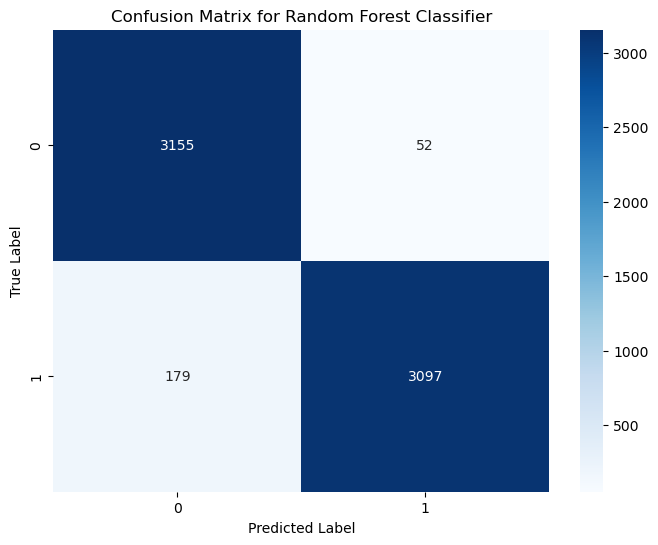

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import pandas as pd

# Select features for the model and target variable
X = merged_df[['MinTemp', 'MaxTemp', 'WindGustSpeed', 'Port1', 'Port2', 'Airline']]
y = (merged_df['Departures_Delayed'] > 0).astype(int)  # 1 if the flight was delayed, 0 otherwise

# Step 2: Preprocessing
# One-Hot Encoding for categorical columns and Standardization for numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns

ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

X_processed = ct.fit_transform(X)

# Standardize the data
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_processed)

# Step 3: Handle Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 4: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train, y_train)

# Step 6: Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [111]:
import pandas as pd

# New data for prediction
new_data_dict = {
    'MinTemp': [20.0],            # Numerical feature
    'MaxTemp': [30.0],            # Numerical feature
    'WindGustSpeed': [50.0],      # Numerical feature
    'Port1': ['Sydney'],          # Categorical feature
    'Port2': ['Melbourne'],       # Categorical feature
    'Airline': ['Qantas']         # Categorical feature
}

# Convert to DataFrame
new_data_df = pd.DataFrame(new_data_dict)
# Transform new data using the existing transformer
new_data_processed = ct.transform(new_data_df)
# Use the trained Random Forest Classifier to make a prediction
if new_data_processed.shape[1] == X_train.shape[1]:
    new_prediction = rf_classifier.predict(new_data_processed)
    print(f"Predicted Flight Delay: {'Delayed' if new_prediction[0] == 1 else 'Not Delayed'}")
else:
    print(f"Feature mismatch between training and new data. Expected {X_train.shape[1]} features but got {new_data_processed.shape[1]} features.")


Predicted Flight Delay: Delayed
